# Vehicle Tracking and Counting Using YOLOv8 and Supervision Framework

### 1. Introduction
This project implements vehicle tracking and counting using a pre-trained YOLOv8 object detection model combined with the Supervision framework. The objective is to annotate and track vehicles from a video, count them as they cross a defined line, and visualize the results with bounding boxes and confidence scores.

---

### 2. Key Concepts and Frameworks Used

#### YOLOv8
- **YOLO** is a state-of-the-art object detection model.
- It is highly efficient for real-time applications due to its speed and accuracy.
- In this project, YOLOv8 is used to detect objects like cars, buses, and motorcycles.

#### Supervision Library
- A utility framework for handling annotations, drawing bounding boxes, and tracking objects.
- Provides functionality for line annotations, object tracking, and enhanced visualizations.

#### ByteTrack Algorithm
- A tracking algorithm integrated with the Supervision framework to track detected objects across video frames.

#### OpenCV
- Used for frame-by-frame video processing and general image manipulation.

---

### 3. Code Implementation with Comments

#### Key Sections

##### Importing Libraries and Initializing Paths
```python
import os
from ultralytics import YOLO
import numpy as np
import supervision as sv

# Set working directory and video paths
HOME = os.getcwd()  # Get the current working directory
SOURCE_VIDEO_PATH = 'YOLO OBJECT TRACKER/straight cars.mp4'  # Input video / can be any other video
TARGET_VIDEO_PATH = f"{HOME}/vehicle-counting-result-with-counter.mp4"  # Ouut video


In [1]:
!nvidia-smi
!/usr/local/opt/python@3.10/bin/python3.10 -m pip install nvidia-smi

zsh:1: command not found: nvidia-smi

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/Users/jingyixu/Desktop/Project 2


In [3]:
!pip install ultralytics
!/usr/local/opt/python@3.10/bin/python3.10 -m pip install ultralytics
from IPython import display
display.clear_output()

!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.32 🚀 Python-3.10.13 torch-2.2.2 CPU (Intel Core(TM) i7-9750H 2.60GHz)
Setup complete ✅ (12 CPUs, 16.0 GB RAM, 260.5/465.6 GB disk)


In [12]:
!pip install supervision
!/usr/local/opt/python@3.10/bin/python3.10 -m pip install supervision
from IPython import display
display.clear_output()

import supervision as sv
print("supervision.__version__:", sv.__version__)

supervision.__version__: 0.25.0


In [14]:
from google.colab import drive
drive.mount('/content/drive')

from ultralytics import YOLO
import numpy as np


In [15]:
# Load YOLOv8 model
MODEL = 'yolov8x.pt'
model =YOLO(MODEL)
model.fuse()  # Optimize the model by fusing layers

YOLOv8x summary (fused): 268 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs


In [16]:
SOURCE_VIDEO_PATH = 'YOLO OBJECT TRACKER/straight cars.mp4'

In [17]:
CLASS_NAMES_DICT

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [18]:
CLASS_NAMES_DICT = model.model.names
selected_classes = [1,2,3,5,7]
selected_classes

[1, 2, 3, 5, 7]


0: 640x384 3 persons, 17 cars, 2 motorcycles, 2 buss, 947.5ms
Speed: 4.6ms preprocess, 947.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


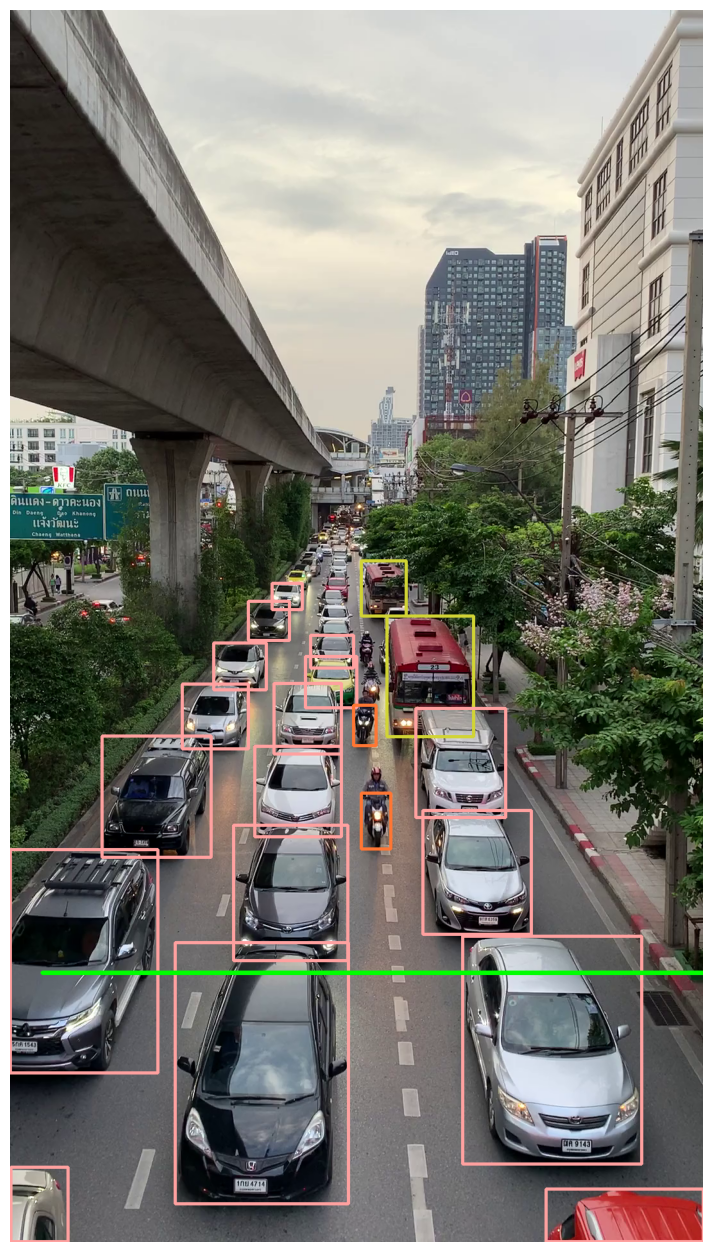

In [22]:
# Generate video frames using Supervision's video frame generator

generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
box_annotator = sv.BoxAnnotator(thickness=4) # Initialize BoxAnnotator for drawing bounding boxes
iterator =iter(generator)
frame = next(iterator)
# Apply YOLO model to the frame and extract detection results
results = model(frame)[0]

# Filter detections by selected classes (e.g., cars, buses, motorcycles)
detections = sv.Detections.from_ultralytics(results)
detections = detections[np.isin(detections.class_id,selected_classes)]
labels = [f'{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}'  for _,_, confidence,class_id,_,_ in detections]
annotated_frame = box_annotator.annotate(scene = frame, detections=detections)

# Define a counting line
LINE_START =sv.Point(50,1500) # Starting point of the line
LINE_END =sv.Point(3840-50,1500) # Ending point of the line

# Annotate the frame with tracking and line counter
annotated_frame = sv.draw_line(scene = annotated_frame, start = LINE_START, end =LINE_END,color = sv.Color.GREEN, thickness=5)
sv.plot_image(annotated_frame, (16,16))

In [ ]:
labels = [f'{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}'  for _,_, confidence,class_id,_,_ in detections]
annotated_frame = box_annotator.annotate(scene = frame, detections=detections , labels=labels)
LINE_START =sv.Point(50,1500)
LINE_END =sv.Point(3840-50,1500)

annotated_frame = sv.draw_line(scene = annotated_frame, start = LINE_START, end =LINE_END,color = sv.Color.GREEN, thickness=5)
sv.plot_image(annotated_frame, (16,16))

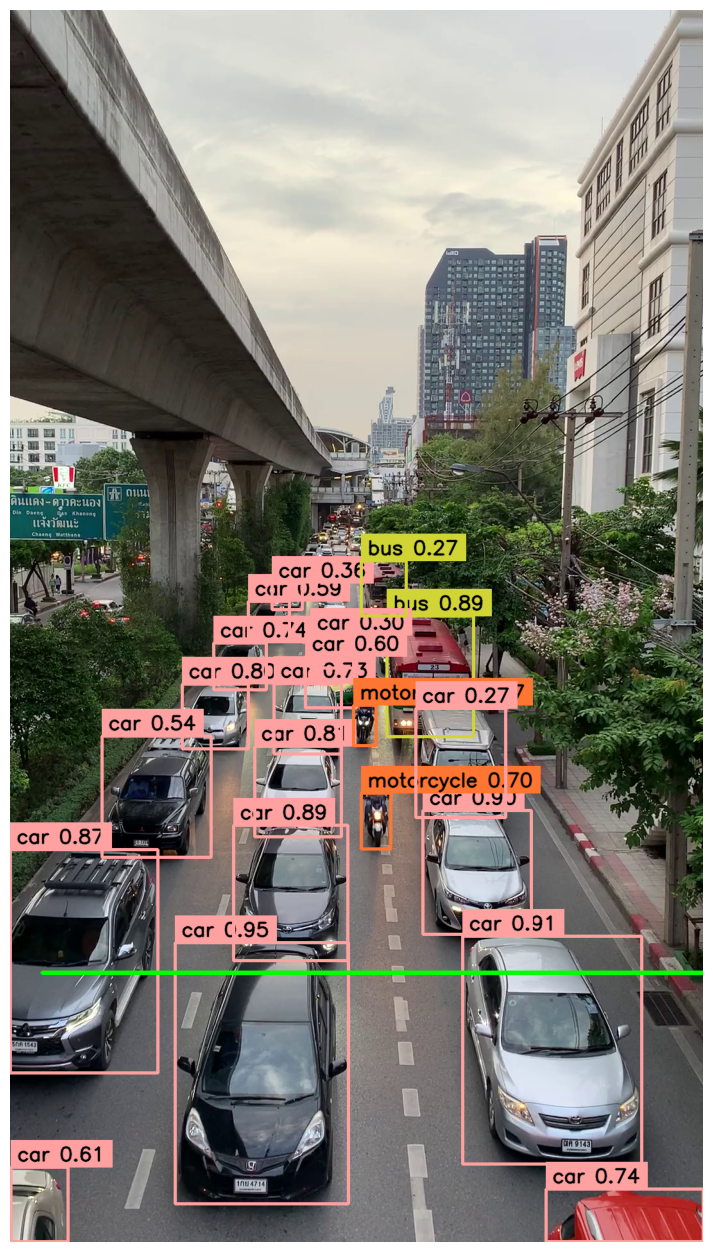

In [25]:
LINE_START =sv.Point(0,1000)
LINE_END =sv.Point(3840-50,1000)
TARGET_VIDEO_PATH = f"{HOME}/vehicle-counting-result-with-counter.mp4"
TARGET_VIDEO_PATH

'/Users/jingyixu/Desktop/Project 2/vehicle-counting-result-with-counter.mp4'

In [26]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)


VideoInfo(width=1080, height=1920, fps=29, total_frames=507)

In [ ]:
byte_tracker = sv.ByteTrack(frame_rate=29)
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
line_zone = sv.LineZone(start=LINE_START, end=LINE_END)
box_annotator = sv.BoxAnnotator(thickness=4)
trace_annotator = sv.TraceAnnotator(thickness=4, trace_length=50)
line_zone_annotator = sv.LineZoneAnnotator(thickness=4,text_thickness=2, text_scale=0.5 )

def callback(frame:np.ndarray, index:int) -> np.ndarray:
  results = model(frame, verbose=False)[0]

  detections = sv.Detections.from_ultralytics(results)
  detections = detections[np.isin(detections.class_id,selected_classes)]

  detections = byte_tracker.update_with_detections(detections)

  labels = [f'{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}'  for _,_, confidence,class_id,tracker_id,_ in detections]
  annotated_frame = trace_annotator.annotate(scene=frame.copy(),detections=detections )
  annotated_frame = box_annotator.annotate(scene = annotated_frame, detections=detections)
  line_zone.trigger(detections)
  return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)



sv.process_video(
    source_path = SOURCE_VIDEO_PATH,
    target_path = TARGET_VIDEO_PATH,
    callback=callback
)